In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv('mall customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.drop(['CustomerID','Gender'], axis=1, inplace=True)

In [5]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [6]:
#df = df.rename(columns={'Age': 'age', 'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'})
df.rename(columns={'Age': 'age', 'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'}, inplace=True)

In [7]:
df.head()

,age,income,score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [8]:
df.shape

(200, 3)

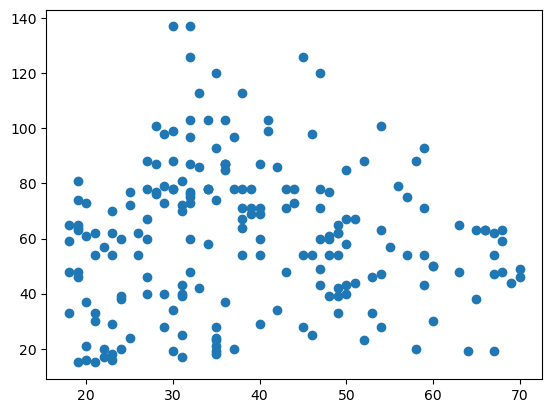

In [9]:
plt.scatter(df.age, df.income)
plt.show()

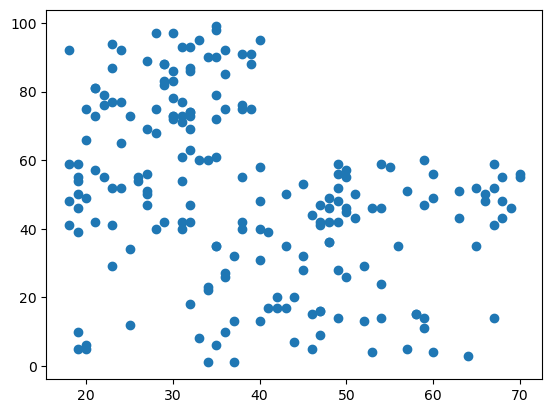

In [10]:
plt.scatter(df.age, df.score)
plt.show()

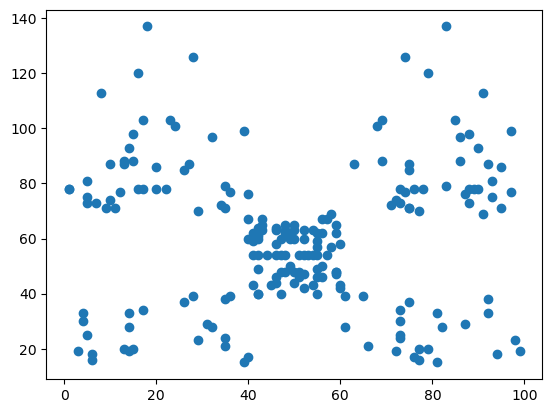

In [11]:
plt.scatter(df.score, df.income)
plt.show()

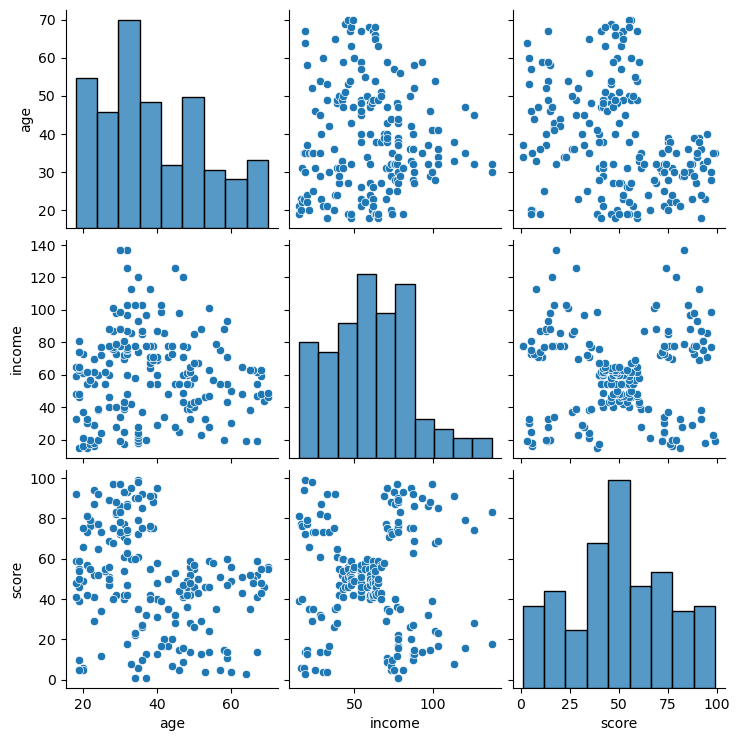

In [12]:
sns.pairplot(df[['age','income','score']])
plt.savefig('image.png')

# KMEANS CLUSTER

[KMeans Cluster](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

[Download this Cheatsheet](https://github.com/rashakil-ds/Top-Data-Science-AI-Book-Collection/blob/main/Other%20Docs/Clustering%20Algorithms.pdf)

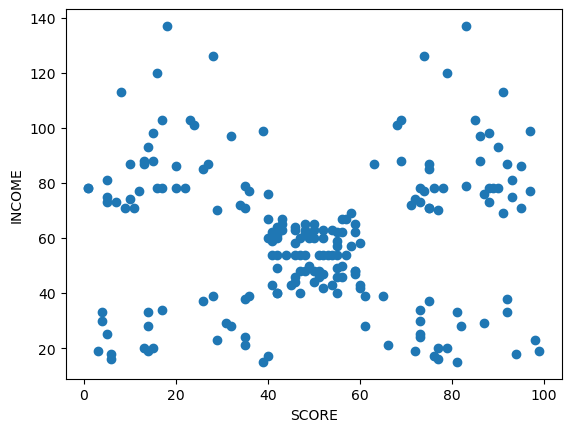

In [13]:
plt.scatter(df.score, df.income) 
plt.xlabel('SCORE')
plt.ylabel('INCOME')
plt.show()

In [14]:
# https://prnt.sc/K9UUIaqJEf2G

In [15]:
from sklearn.cluster import KMeans
km1 = KMeans() #default cluster = 8

In [16]:
km1.fit_predict(df[['income', 'score']])

array([3, 2, 3, 2, 3, 2, 3, 6, 3, 2, 3, 6, 3, 2, 3, 2, 3, 2, 3, 6, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 6, 3, 2, 3, 6, 3, 2, 3, 2, 3, 2, 4, 6, 4, 4,
       3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 7, 1, 7, 1,
       0, 1, 7, 1, 7, 1, 7, 1, 7, 1, 0, 1, 7, 1, 0, 1, 7, 1, 7, 1, 7, 1,
       7, 1, 7, 1, 7, 1, 0, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1,
       7, 1, 7, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1])

In [17]:
df.head()

,age,income,score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [18]:
df['km1_cluster'] = km1.fit_predict(df[['income', 'score']])
df.head()

,age,income,score,km1_cluster
0,19,15,39,4
1,21,15,81,0
2,20,16,6,4
3,23,16,77,0
4,31,17,40,4


In [19]:
km1.predict([[20, 37]])

array([4])

In [20]:
km1.cluster_centers_

array([[ 25.0952381 ,  80.04761905],
       [ 63.95238095,  46.21428571],
       [ 80.375     ,  82.9375    ],
       [ 47.44444444,  51.24444444],
       [ 25.14285714,  19.52380952],
       [109.7       ,  22.        ],
       [114.71428571,  78.42857143],
       [ 80.18181818,  12.68181818]])

In [21]:
df8 = df[df.km1_cluster==7]

In [22]:
df8

,age,income,score,km1_cluster
128,59,71,11,7
130,47,71,9,7
134,20,73,5,7
136,44,73,7,7
138,19,74,10,7
140,57,75,5,7
144,25,77,12,7
148,34,78,22,7
150,43,78,17,7
152,44,78,20,7


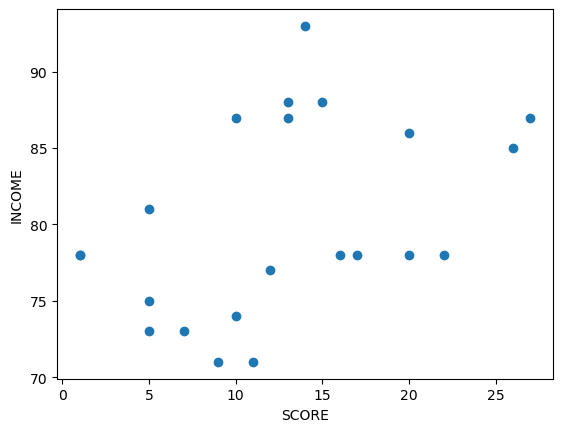

In [23]:
plt.scatter(df8.score, df8.income) 
plt.xlabel('SCORE')
plt.ylabel('INCOME')
plt.show()

In [24]:
df1 = df[df.km1_cluster==0]
df2 = df[df.km1_cluster==1]
df3 = df[df.km1_cluster==2]
df4 = df[df.km1_cluster==3]
df5 = df[df.km1_cluster==4]
df6 = df[df.km1_cluster==5]
df7 = df[df.km1_cluster==6]

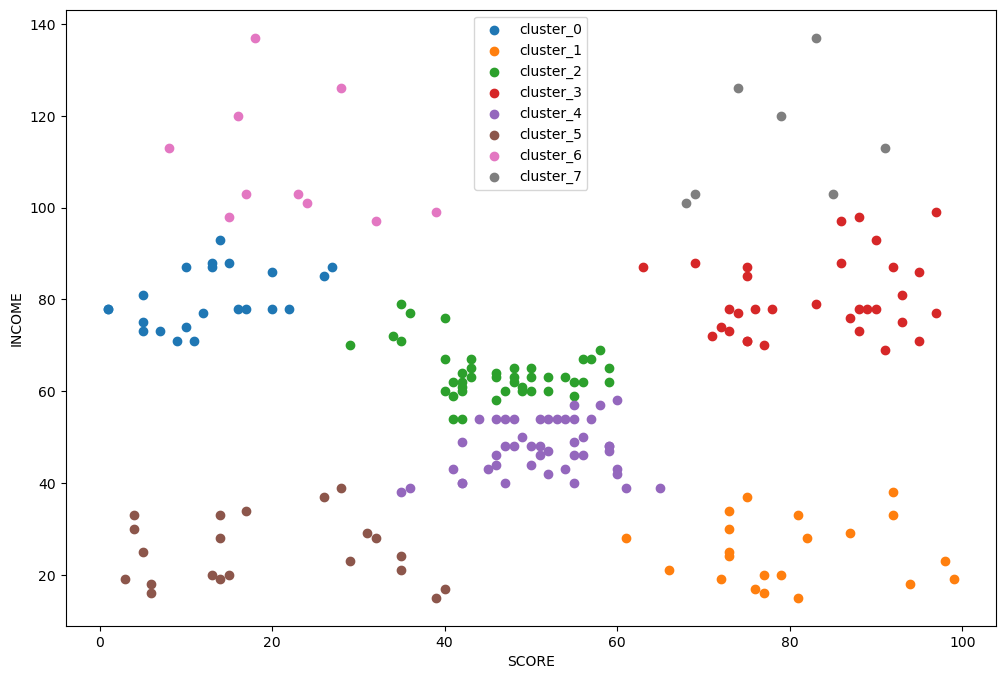

In [25]:
plt.figure(figsize=(12,8))

plt.scatter(df8.score, df8.income, label='cluster_0') 
plt.scatter(df1.score, df1.income, label='cluster_1') 
plt.scatter(df2.score, df2.income,  label='cluster_2') 
plt.scatter(df3.score, df3.income, label='cluster_3')
plt.scatter(df4.score, df4.income, label='cluster_4') 
plt.scatter(df5.score, df5.income, label='cluster_5') 
plt.scatter(df6.score, df6.income, label='cluster_6') 
plt.scatter(df7.score, df7.income, label='cluster_7') 

plt.legend()
plt.xlabel('SCORE')
plt.ylabel('INCOME')
plt.show()

<AxesSubplot:xlabel='score', ylabel='income'>

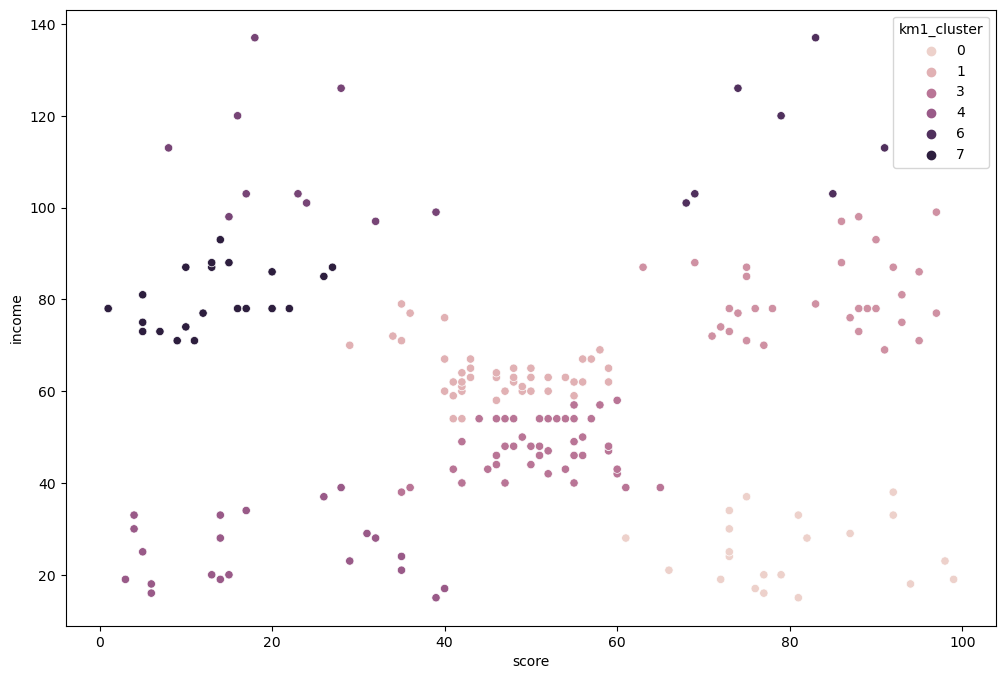

In [26]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='score', y='income', hue='km1_cluster' )

# Within-Cluster Sum of Squares (WCSS): How many clusters are good enough?

In [27]:
wcss = []

for i in range(1,15):
    km2 = KMeans(n_clusters=i)
    km2.fit(df[['income', 'score']])
    wcss.append(km2.inertia_)

In [28]:
wcss

[269981.28,
 186195.07171089778,
 106348.37306211118,
 73880.64496247194,
 44448.45544793371,
 38858.9599751439,
 31969.426550235476,
 28707.285166868016,
 23770.1169812072,
 20178.628732939113,
 17609.079420937487,
 16099.925688363925,
 15379.933588968503,
 14772.920726904675]

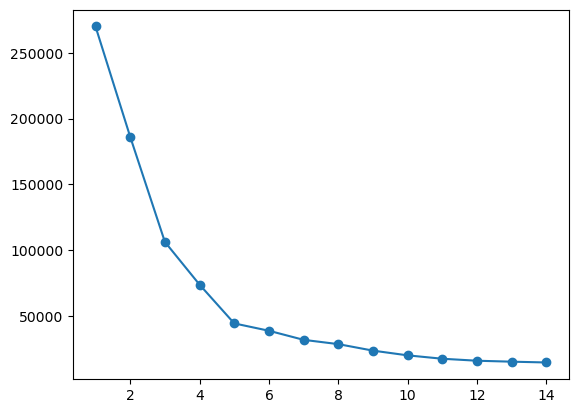

In [29]:
plt.plot(range(1,15), wcss, marker='o')

In [30]:
from kneed import KneeLocator

In [31]:
kne = KneeLocator(range(1,15), wcss, curve='convex', direction='decreasing')

In [32]:
kne

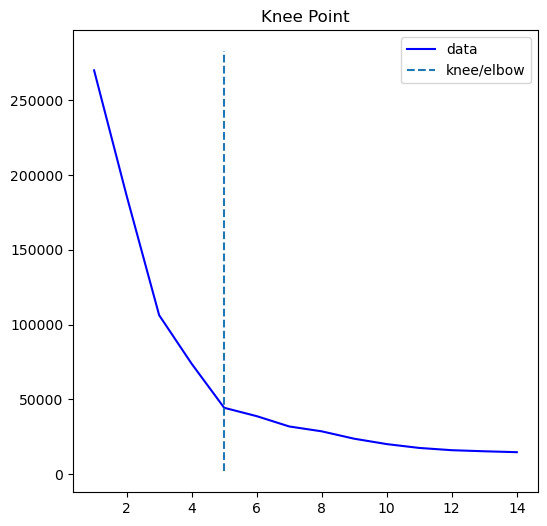

In [33]:
kne.plot_knee()

In [34]:
kne.knee

5

# Finally

In [35]:
km3 = KMeans(n_clusters=5)

In [36]:
df['km1_cluster'] = km3.fit_predict(df[['income', 'score']])
df.head()

,age,income,score,km1_cluster
0,19,15,39,3
1,21,15,81,1
2,20,16,6,3
3,23,16,77,1
4,31,17,40,3


In [37]:
km3.cluster_centers_

array([[86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

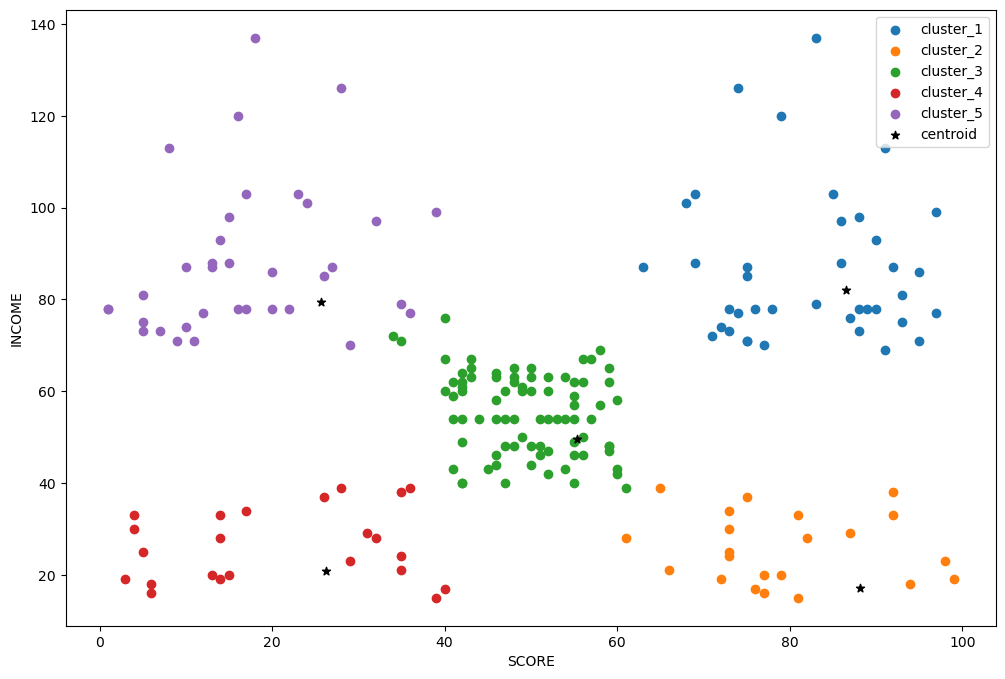

In [38]:
df1 = df[df.km1_cluster==0]
df2 = df[df.km1_cluster==1]
df3 = df[df.km1_cluster==2]
df4 = df[df.km1_cluster==3]
df5 = df[df.km1_cluster==4]

plt.figure(figsize=(12,8))
 
plt.scatter(df1.score, df1.income, label='cluster_1') 
plt.scatter(df2.score, df2.income,  label='cluster_2') 
plt.scatter(df3.score, df3.income, label='cluster_3')
plt.scatter(df4.score, df4.income, label='cluster_4') 
plt.scatter(df5.score, df5.income, label='cluster_5') 

plt.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:,1], label='centroid', color='black', marker='*')

plt.legend()
plt.xlabel('SCORE')
plt.ylabel('INCOME')
plt.show()